In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

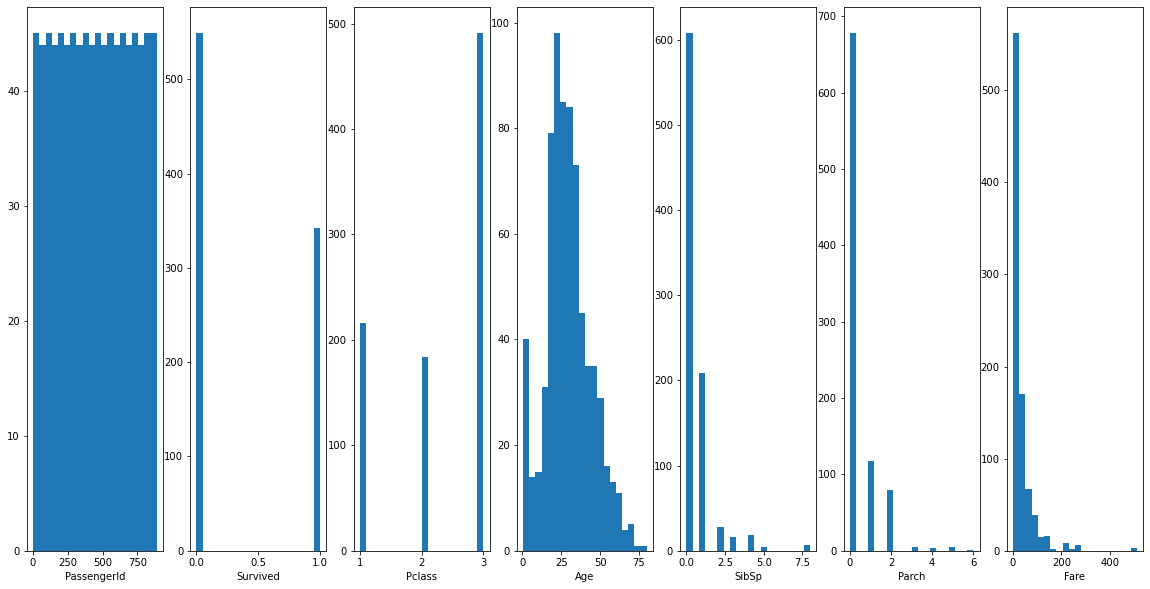

In [7]:
# See the distribution of the numeric data
numeric_cols = data.select_dtypes(exclude=['object'])
fig, axes = plt.subplots(1, len(numeric_cols.columns), figsize=(20,10))
for i, col in zip(np.arange(len(numeric_cols.columns)), numeric_cols.columns):
    axes[i].hist(numeric_cols[col], bins=20)
    axes[i].set_xlabel("{}".format(col))

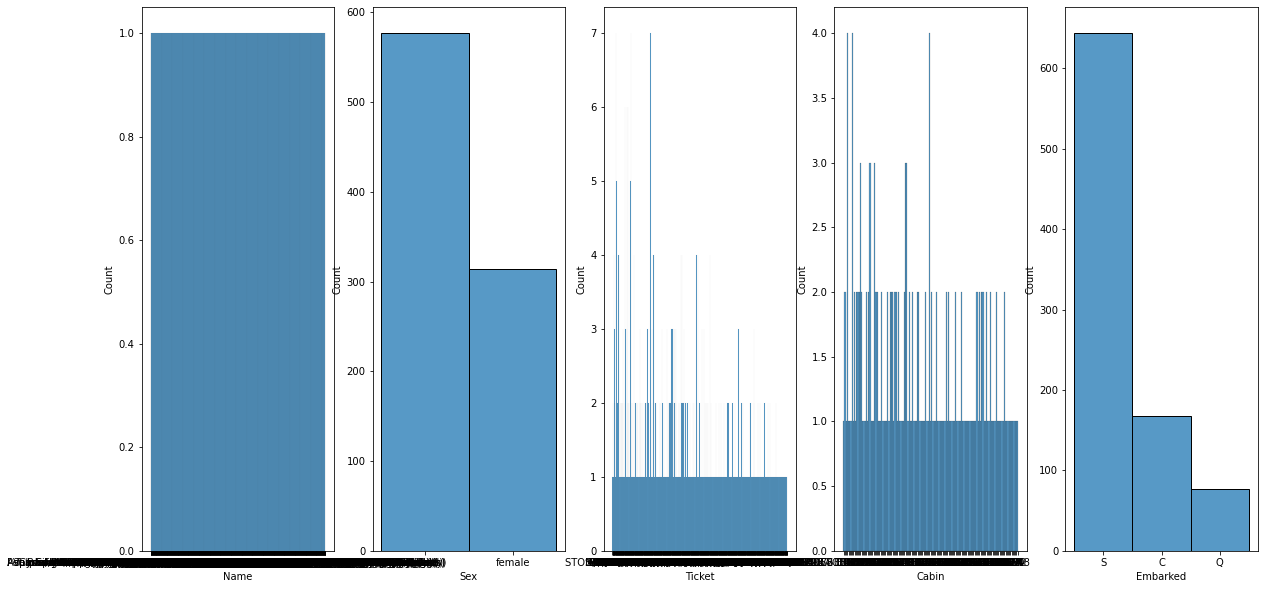

In [8]:
import seaborn as sns

cate_col = data.select_dtypes(include = ['object'])
fig, axes2 = plt.subplots(1, len(cate_col.columns), figsize=(20, 10))
for i, col in zip(np.arange(len(cate_col.columns)), cate_col.columns):
    sns.histplot(x=cate_col[col], ax= axes2[i], bins=20, )
    axes2[i].set_xlabel("{}".format(str(col)))

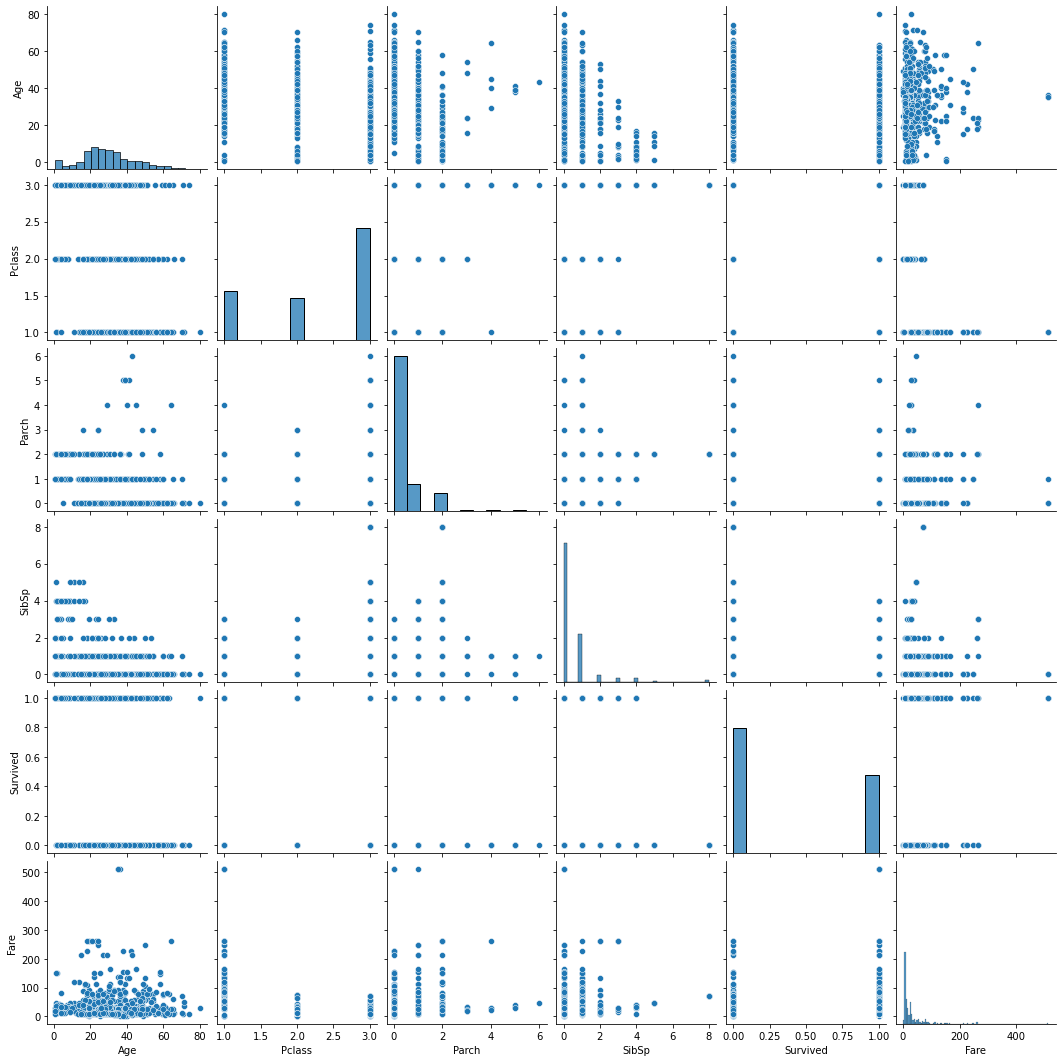

In [9]:
### Draw a pairplot
text_features = ['Name', 'Ticket', 'Cabin', 'PassengerId']
features = data.columns
to_draw = list(set(features) - set(text_features))
sns.pairplot(data[to_draw])

In [10]:
#scale fare and age
#Family = Sibsp + Parhc + 1
#Cabin: is_cabin & word
def min_max(col):
    col = (col - col.min()) / (col.max()-col.min())
    
    return col

Fare_ = min_max(data['Fare'])
Age_ = min_max(data['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

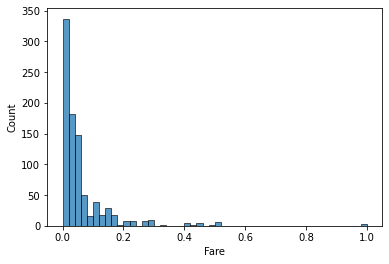

In [11]:
sns.histplot(x=Fare_, bins=50)

<AxesSubplot:xlabel='Age', ylabel='Count'>

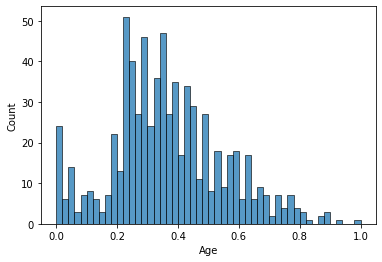

In [12]:
sns.histplot(x=Age_, bins=50)

In [13]:
logFare = np.log(data['Fare'])
logAge = np.log(data['Age'])

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Fare', ylabel='Count'>

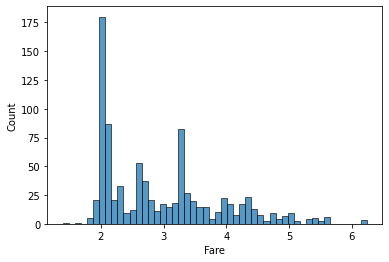

In [14]:
sns.histplot(x=logFare, bins=50)

<AxesSubplot:xlabel='Age', ylabel='Count'>

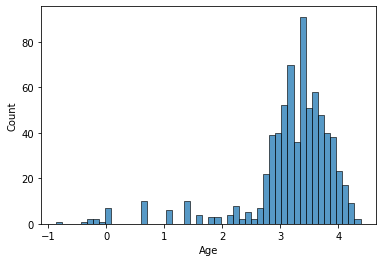

In [15]:
sns.histplot(x=logAge, bins=50)

In [16]:
data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [17]:
data.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [18]:
import re
def select_title(x):
    pattern = '([A-Za-z]*?)\.'
    result = re.search(pattern, x)
    return result[0][:-1]

In [19]:
data['Title'] = data['Name'].apply(select_title)

In [20]:
replace = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Ms': 'Ms',
    'Jonkheer': 'Other',
    'Countess':'Ms',
    'Capt': 'Other',
    'Don': 'Mr',
    'Major' : 'Other',
    'Mlle': 'Miss',
    'Mme' : 'Mrs',
    'Lady':'Mrs',
    'Col': 'Other',
    'Dr': 'Mr',
    'Master': 'Mr',
    'Sir': 'Mr',
    'Rev' : 'Other',
}

In [21]:
data['Title_rep'] = data['Title'].map(replace)

In [22]:
data['Title_rep']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title_rep, Length: 891, dtype: object

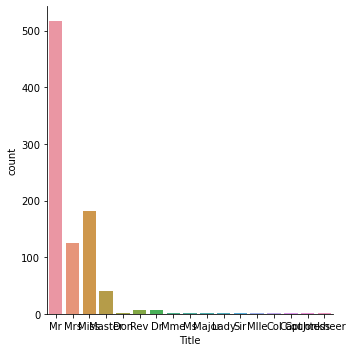

In [23]:
sns.catplot(x='Title', data=data, kind='count')

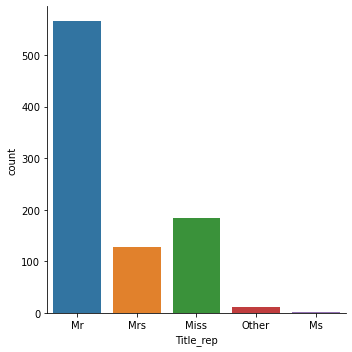

In [24]:
sns.catplot(x='Title_rep', data=data, kind='count')

+ Relationship between Title and Sruvival

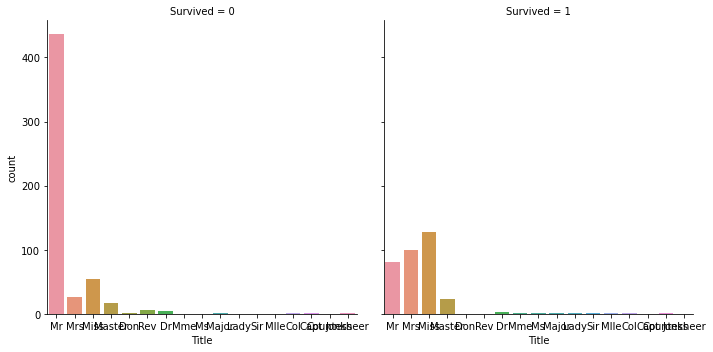

In [25]:
sns.catplot(x='Title', data=data, kind='count', col = 'Survived')

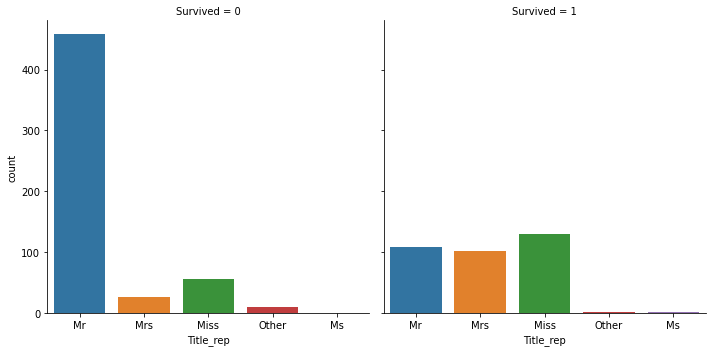

In [26]:
sns.catplot(x='Title_rep', data=data, kind='count', col = 'Survived')

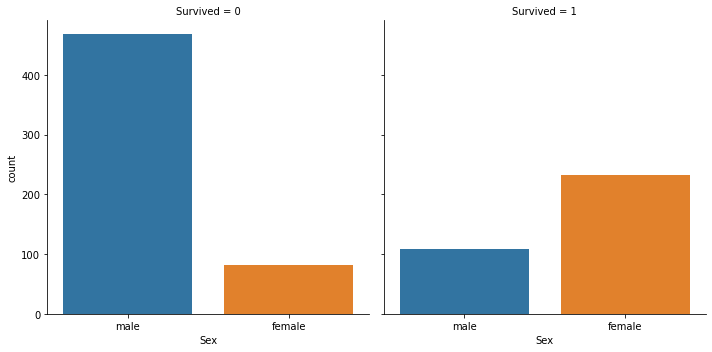

In [27]:
sns.catplot(x='Sex', data=data, kind='count', col='Survived')

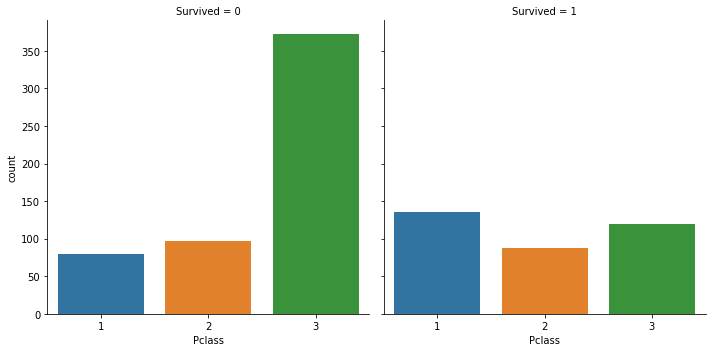

In [28]:
sns.catplot(x='Pclass', data=data, kind='count', col='Survived')

## Test

In [29]:
test = pd.read_csv('test.csv')

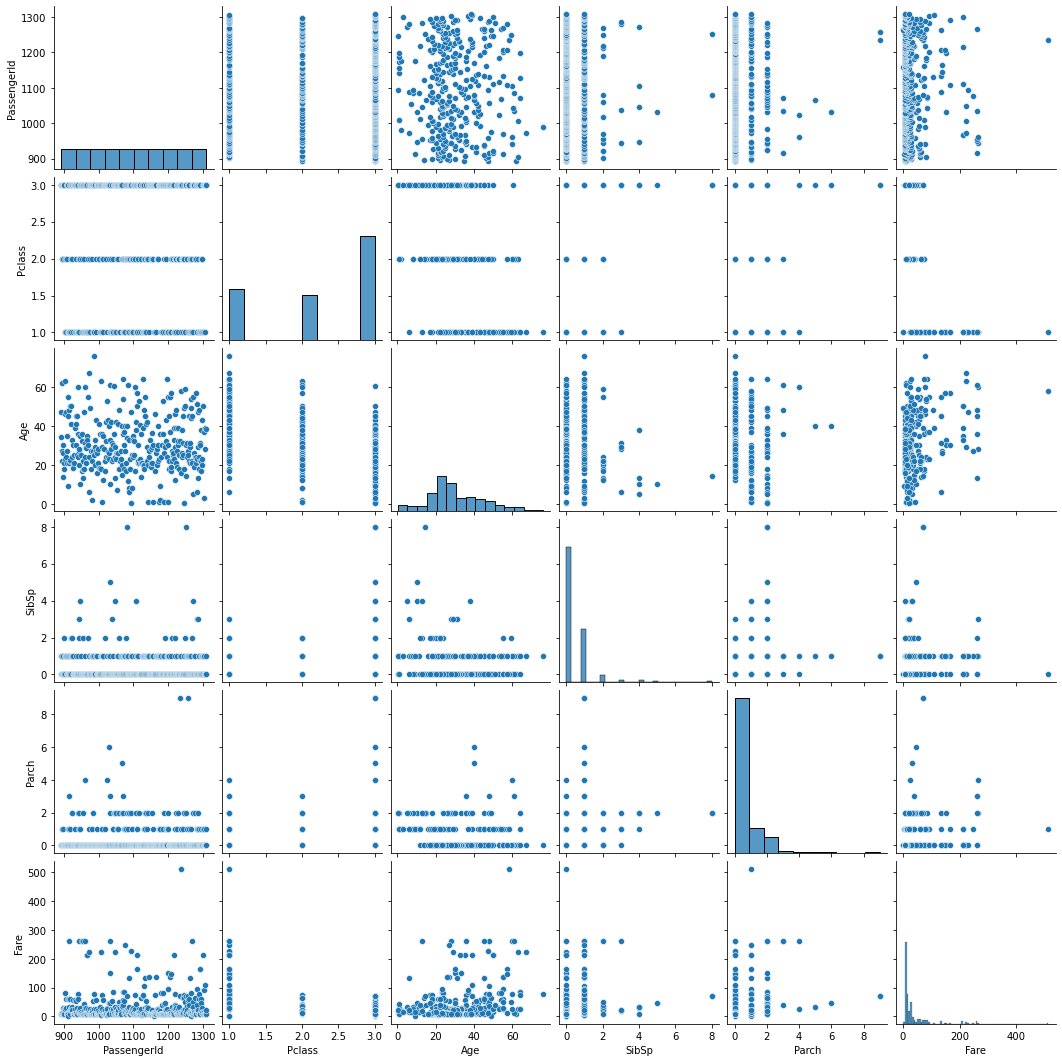

In [30]:
sns.pairplot(test)

In [31]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
data['is_Cabin'] = data['Cabin'].isnull().apply(lambda x: 0 if x == True else 1)

In [33]:
data['letter_Cabin'] = data['Cabin'].fillna('U').apply(lambda x: x[:1])

In [34]:
data['letter_Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

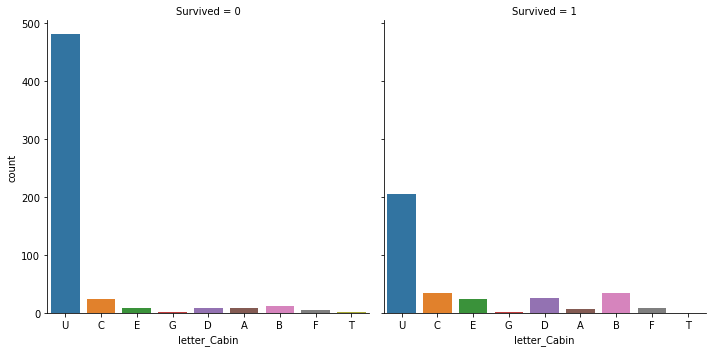

In [35]:
sns.catplot(data=data,x='letter_Cabin', kind='count', col='Survived')

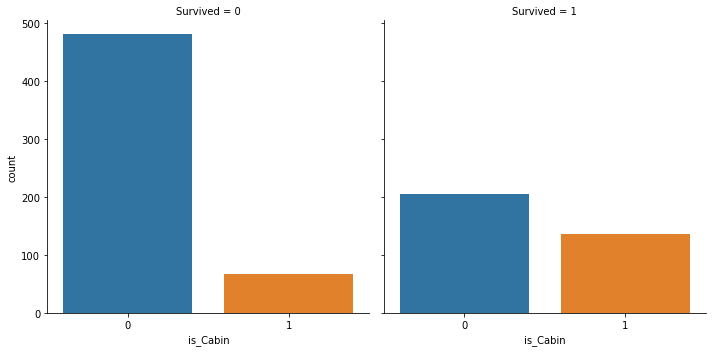

In [36]:
sns.catplot(data=data,x='is_Cabin', kind='count', col='Survived')

In [37]:
def divide_dig(x):
    pat_dig = '[0-9]+'
    
    dig = re.search(pat_dig, x)
    if dig is None:
        return -1
    else:
        return dig[0]

def divide_let(x):
    pat_let = '[^0-9]+'
    let = re.search(pat_let, x)
    if let is None:
        return np.nan
    else:
        return let[0]
data['Ticket_Num']= data['Ticket'].apply(divide_dig)
data['Ticket_let']= data['Ticket'].apply(divide_let)

In [38]:
data['Ticket_Num'].unique()

array(['5', '17599', '2', '113803', '373450', '330877', '17463', '349909',
       '347742', '237736', '9549', '113783', '347082', '350406', '248706',
       '382652', '244373', '345763', '2649', '239865', '248698', '330923',
       '113788', '347077', '2631', '19950', '330959', '349216', '17601',
       '17569', '335677', '24579', '17604', '113789', '2677', '345764',
       '2651', '7546', '11668', '349253', '2123', '330958', '4', '370371',
       '14311', '2662', '349237', '3101295', '17572', '2926', '113509',
       '19947', '31026', '2697', '34651', '2144', '2669', '113572',
       '36973', '347088', '17605', '2661', '29395', '3464', '3101281',
       '315151', '33111', '14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059', '14885', '3101278', '6608', '392086', '343275', '343276',
       '347466', '5734', '2315', '364500', '374910', '17754', '17759',
       '231919', '244367', '349245', '349215', '35281', '754

In [39]:
data['Ticket_let'].unique()

array(['A/', 'PC ', 'STON/O', nan, 'PP ', 'C.A. ', 'A./', 'SC/Paris ',
       'S.C./A.', 'CA ', 'S.P. ', 'S.O.C. ', 'SO/C ', 'W./C. ',
       'SOTON/OQ ', 'W.E.P. ', 'STON/O ', 'A', 'C ', 'SOTON/O.Q. ',
       'SC/PARIS ', 'S.O.P. ', 'A.', 'Fa ', 'CA. ', 'LINE', 'F.C.C. ',
       'W/C ', 'SW/PP ', 'SCO/W ', 'P/PP ', 'SC ', 'SC/AH ', 'A/S ',
       'SC/AH Basle ', 'WE/P ', 'S.W./PP ', 'S.O./P.P. ', 'F.C. ',
       'SOTON/O', 'S.C./PARIS ', 'C.A./SOTON '], dtype=object)

In [40]:
data['Ticket_let'].value_counts()

PC              60
C.A.            27
A/              23
STON/O          12
W./C.            9
SOTON/O.Q.       8
CA.              8
SOTON/OQ         7
CA               6
STON/O           6
C                5
F.C.C.           5
S.O.C.           5
SC/PARIS         5
SC/Paris         4
LINE             4
PP               3
S.O./P.P.        3
A./              2
A.               2
WE/P             2
SOTON/O          2
S.C./PARIS       2
SC/AH            2
P/PP             2
S.W./PP          1
SC               1
F.C.             1
SC/AH Basle      1
A/S              1
S.O.P.           1
SCO/W            1
SW/PP            1
W/C              1
Fa               1
A                1
W.E.P.           1
SO/C             1
S.P.             1
S.C./A.          1
C.A./SOTON       1
Name: Ticket_let, dtype: int64

In [41]:
data['Ticket_Num'].value_counts()

5         21
2         20
4          8
347082     7
1601       7
          ..
349243     1
250651     1
226593     1
9234       1
370376     1
Name: Ticket_Num, Length: 636, dtype: int64

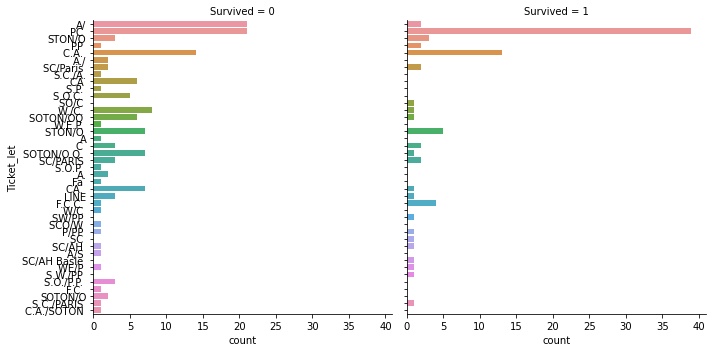

In [42]:
sns.catplot(data= data, y='Ticket_let', kind='count', col='Survived')

In [43]:
data['Have_let'] = data['Ticket_let'].isnull().apply(lambda x: 1 if x == True else 0)

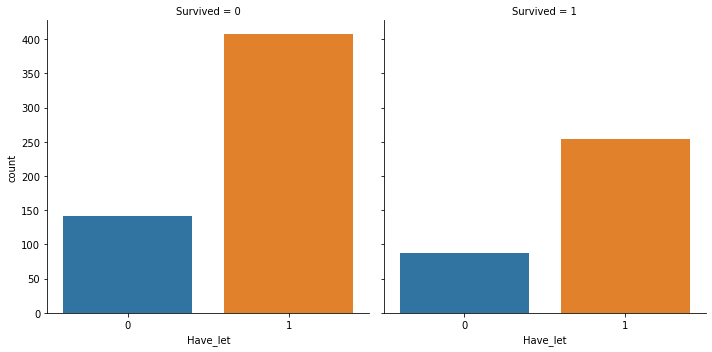

In [44]:
sns.catplot(data = data, x = 'Have_let', kind='count', col='Survived')

In [45]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

+ Fill na
+ Embarked : Most Frequent
+ Age : Mean

+ Family_member = Sib + Parch
+ Cabin : Have cabin, select letter from cabin
+ Target Encoding
+ Age:
    + Cut
    + Log
+ Ticket number: Value count/ Prefix / number
    + Prefix: values count, target encoding
    + Number: values count
    + Ticket: values count
+ Fare:
    + Log
+ Sib : Have Sib
+ Parch : Have Parch

In [46]:
data['Have_Age'] = data['Age'].isna().apply(lambda x: 1 if x==True else 0)

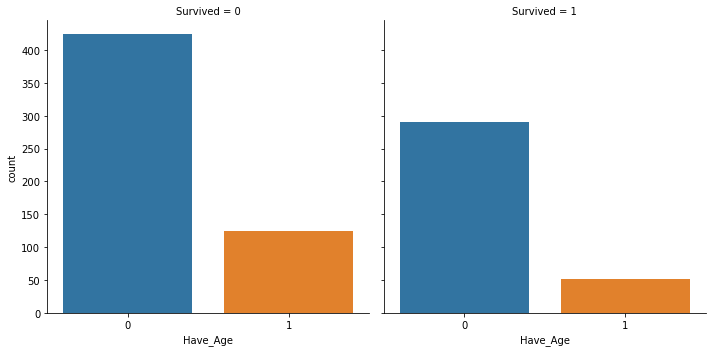

In [47]:
sns.catplot(data= data, x='Have_Age', kind='count', col='Survived')

In [48]:
filled_age = data['Age'].fillna(np.mean(data['Age']))

<AxesSubplot:xlabel='Age', ylabel='Count'>

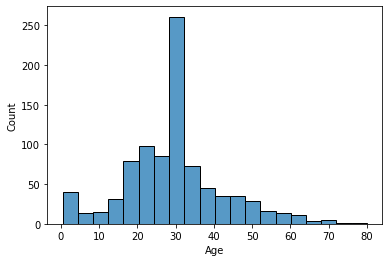

In [49]:
sns.histplot(filled_age, bins=20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

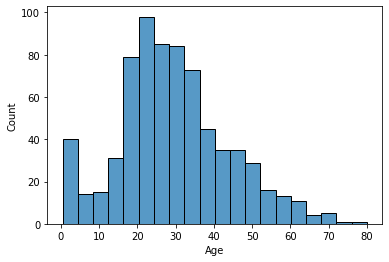

In [50]:
sns.histplot(data['Age'], bins=20)

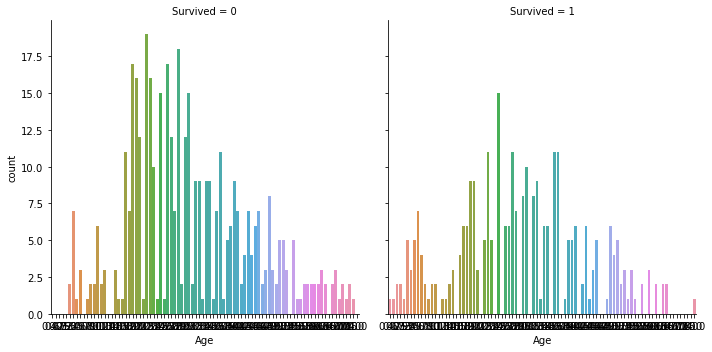

In [53]:
sns.catplot(data=data, x='Age', col='Survived', kind='count')